In [3]:
import pandas as pd #importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
cardio = pd.read_csv('/content/Cardiotocographic.csv') #importing the dataset
print(cardio.shape)
cardio.head()

(2126, 14)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


**Dataset:**
* **LB** - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
* **AC** - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
* **FM** - May indicate "Fetal Movements" detected by the monitor.
* **UC** - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
* **DL** - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
* **DS** - May represent "Decelerations Short" or decelerations of brief duration.
* **DP** - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
* **ASTV** - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
* **MSTV** - Likely stands for "Mean Value of Short Term Variability" in the FHR.
* **ALTV** - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
* **MLTV** - Might indicate "Mean Value of Long Term Variability" in the FHR.

**By considering the above terms I conclude that the dataset is about heart rate of a baby in mother womb**

# Data Cleaning and Preparation:

In [5]:
cardio.isna().sum() #checking null values present in the dataset

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


**By checking the null values in the dataset ,I conclude that the dataset contains 1% missing values in LB,AC,DS,DP,MLTV,WIDTH,TENDENCY AND NSP**

In [6]:
for i in cardio.columns:
    cardio[i].fillna(cardio[i].median(),inplace=True) #Replacing null values with median
cardio.isna().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


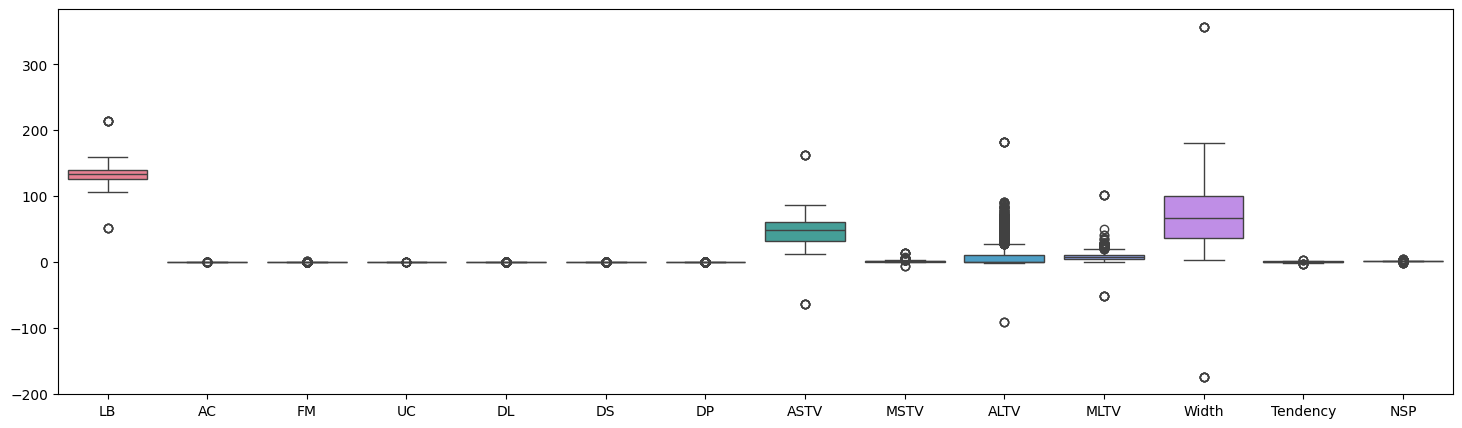

In [7]:
plt.figure(figsize=(18,5))
sns.boxplot(data=cardio)
plt.show()

**By considering the above box plot LB,ASTV,MSTV,ALTV,MLTV,Width and Tendency contains outliers**

In [8]:
def outlier_filter(df):
    outliers = pd.DataFrame() #Creating a dataframe for append the outliers to it
    for i in df.columns:
        q1 = df[i].quantile(0.25) #Calculating the first quantile
        q3 = df[i].quantile(0.75) #Calculating the second quantile

        IQR = q3 - q1 #Calculating the IQR value

        lower_bound = q1 - (IQR * 1.5) #Calculating lower bound value
        upper_bound = q3 + (IQR * 1.5) #Calculating upper bound value

        outliers_data = df[(df[i]<lower_bound) | (df[i]>upper_bound)] #find the outliers in the dataset
        outliers = pd.concat([outliers, outliers_data]) #Append the value to outliers dataframe

    return outliers #Get the dataset which contains outliers in the dataset

outliers = outlier_filter(cardio)
cardio_outliers = outliers.drop_duplicates().reset_index().drop('index',axis=1) #Create a separate dataframe for outliers by droping duplicates
cardio_outliers

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,52.0,0.001590,0.000000,0.029851,0.000000,0.000000,0.000003,58.000000,0.500000,0.0,7.9,44.000000,1.0,1.000000
1,214.0,0.000000,0.000000,0.001595,0.001595,0.000000,0.000000,71.000000,0.300000,17.0,5.8,15.000000,0.0,2.000000
2,214.0,0.002469,0.002469,0.002469,0.000000,0.000004,0.000000,35.000000,1.798149,0.0,24.7,118.000000,1.0,1.000000
3,214.0,0.005181,0.012953,0.002591,0.000000,0.000000,0.000000,39.442226,1.600000,0.0,10.0,136.000000,0.0,0.991200
4,52.0,0.000834,0.013344,0.000000,0.000000,0.000000,0.000000,53.000000,0.700000,8.0,12.0,77.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,133.0,0.000000,0.001261,0.007563,0.000000,0.000000,0.000000,69.945069,2.000000,6.0,2.5,68.000000,0.0,1.013864
1226,136.0,0.000000,0.001280,0.007682,0.001280,0.000000,0.000000,67.000000,1.900000,0.0,5.3,44.680341,1.0,0.989862
1227,140.0,0.000775,0.000000,0.006979,0.000000,0.000000,0.000000,78.000000,0.400000,22.0,7.1,66.000000,1.0,2.000000
1228,140.0,0.000980,0.000000,0.006863,0.000000,0.000000,0.000000,79.000000,0.400000,20.0,6.1,67.000000,1.0,1.990464


In [9]:
data = cardio[~cardio.index.isin(outliers.index)] #Creating dataframe by removing the outliers in the dataset
cardio = data.reset_index().drop('index',axis=True)
cardio

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,132.000000,0.006380,0.00000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
1,133.000000,0.003322,0.00000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
2,131.948232,0.006515,0.00000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
3,114.000000,0.004559,0.00000,0.004559,0.003040,0.0,0.0,24.0,3.2,0.000000,16.2,134.0,0.000000,1.0
4,133.000000,0.001634,0.00000,0.008086,0.000000,0.0,0.0,29.0,1.3,0.000000,7.4,67.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,136.000000,0.000000,0.00207,0.008282,0.000000,0.0,0.0,67.0,1.5,11.000000,4.7,38.0,0.000000,1.0
892,140.000000,0.000000,0.00000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
893,140.000000,0.000000,0.00000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
894,140.000000,0.000000,0.00000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0


**By considering the outliers dataframe i conclude that there are more no of outliers in the dataset than the dataframe which does not contains outliers**

In [10]:
cardio.info() #Get the some information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        896 non-null    float64
 1   AC        896 non-null    float64
 2   FM        896 non-null    float64
 3   UC        896 non-null    float64
 4   DL        896 non-null    float64
 5   DS        896 non-null    float64
 6   DP        896 non-null    float64
 7   ASTV      896 non-null    float64
 8   MSTV      896 non-null    float64
 9   ALTV      896 non-null    float64
 10  MLTV      896 non-null    float64
 11  Width     896 non-null    float64
 12  Tendency  896 non-null    float64
 13  NSP       896 non-null    float64
dtypes: float64(14)
memory usage: 98.1 KB


In [11]:
cardio_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        1230 non-null   float64
 1   AC        1230 non-null   float64
 2   FM        1230 non-null   float64
 3   UC        1230 non-null   float64
 4   DL        1230 non-null   float64
 5   DS        1230 non-null   float64
 6   DP        1230 non-null   float64
 7   ASTV      1230 non-null   float64
 8   MSTV      1230 non-null   float64
 9   ALTV      1230 non-null   float64
 10  MLTV      1230 non-null   float64
 11  Width     1230 non-null   float64
 12  Tendency  1230 non-null   float64
 13  NSP       1230 non-null   float64
dtypes: float64(14)
memory usage: 134.7 KB


# Statistical Summary:

In [12]:
cardio.describe() #Get the decriptive statistical information about the data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.0,896.0,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.0
mean,131.859413,0.004036,0.000606,0.004961,0.001547,0.0,0.0,42.465669,1.273759,3.153095,8.596245,67.784187,0.333758,1.0
std,9.393070,0.003710,0.001346,0.002707,0.002214,0.0,0.0,15.055465,0.541923,6.032308,4.457159,32.370319,0.585941,0.0
min,106.000000,-0.000122,-0.002467,-0.000101,-0.000124,0.0,0.0,15.000000,0.300000,-1.043619,-0.136053,12.000000,-1.006614,1.0
25%,125.000000,0.000006,0.000000,0.003143,0.000000,0.0,0.0,29.000000,0.900000,0.000000,5.600000,41.000000,0.000000,1.0
50%,133.000000,0.003311,0.000000,0.005039,0.000000,0.0,0.0,41.000000,1.200000,0.000000,8.400000,62.000000,0.000000,1.0
75%,138.000000,0.006672,0.000323,0.006927,0.003083,0.0,0.0,56.000000,1.600000,4.000000,11.322598,92.000000,1.000000,1.0
max,160.000000,0.013861,0.006272,0.012072,0.008197,0.0,0.0,79.000000,3.200000,27.000000,20.000000,176.310998,1.023635,1.0


# Key Insights
* In **LB :** The range is from 106 to 160 and the total no of values are 896. The mean for the column is 131.85 , median is 133 so, there is no much difference in that
* Form the columns **AC, FM,UC and DL** I conclude that, there is so much difference in the mean and median.
* **DS, DP and NSP** columns which contains minimun and maximum values are same. By that I conclude that there is only one type of values are present. In **DS and DP** which contains 0 as single type value and in NSP 1 as single type variable
* In column **ASTV**, mean and median are 42.46 and 41 with standard deviation 15.05. By this for every standard deviation there is step in 15.05 and here also no much defference in the mean and median.
* In **ALTV** column, The quantile 1 and quantile 2 have same values it indicates that more datapoints below the median and this column contains more difference in the median and mean than before columns which I observed

In [13]:
cardio_outliers.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.00000,1230.000000,1230.000000
mean,134.418895,0.002598,0.016661,0.003975,0.002149,0.000004,0.000300,50.296116,1.430391,15.481940,8.042970,72.29753,0.298305,1.521128
std,12.265153,0.004708,0.088188,0.003681,0.003949,0.000185,0.001082,20.520580,1.468808,26.208032,9.425971,48.82542,0.681714,0.773562
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.00000,-3.000000,-1.025988
25%,128.000000,0.000000,0.000000,0.001257,0.000000,0.000000,0.000000,35.000000,0.500000,0.000000,4.000000,31.00000,0.000000,1.000000
50%,133.000000,0.000000,0.000000,0.003972,0.000000,0.000000,0.000000,53.000000,1.100000,0.000000,6.800000,73.00000,0.000000,1.000000
75%,142.000000,0.004119,0.007506,0.006135,0.003522,0.000000,0.000000,64.000000,2.000000,28.000000,10.200000,107.00000,1.000000,2.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.00000,3.000000,5.000000


# Data Visualization:

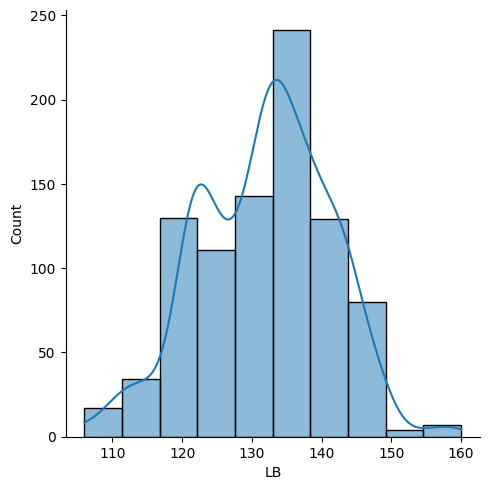

In [14]:
sns.displot(data=cardio,x='LB',bins=10,kde=True) #Creating histogram using seaborn with 10 bins for LB column of dataset which does not contains outliers
plt.show()

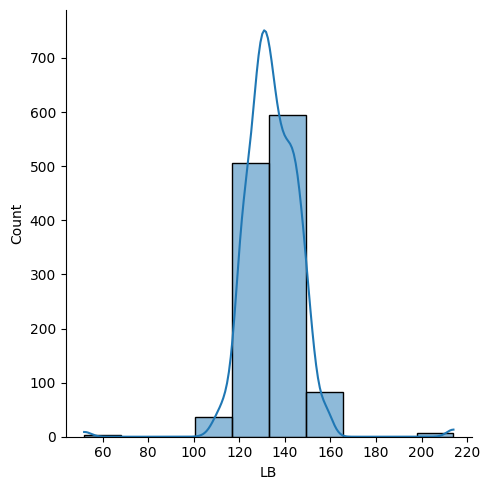

In [15]:
sns.displot(data=cardio_outliers,x='LB',bins=10,kde=True) #Creating histogram using seaborn with 10 bins for LB column of dataset which contains outliers
plt.show()

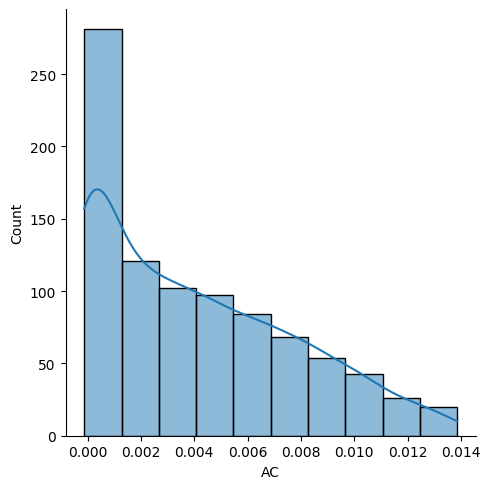

In [16]:
sns.displot(data=cardio,x='AC',bins=10,kde=True)
plt.show()

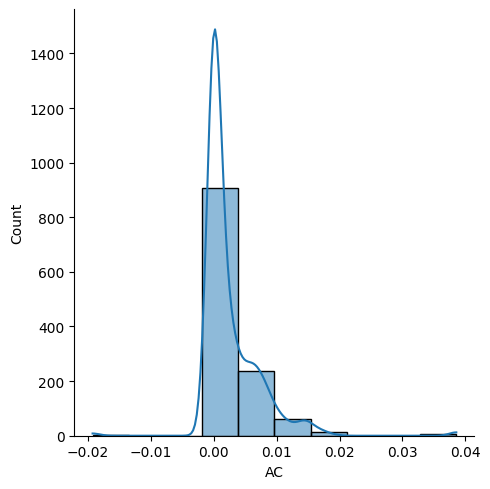

In [17]:
sns.displot(data=cardio_outliers,x='AC',bins=10,kde=True)
plt.show()

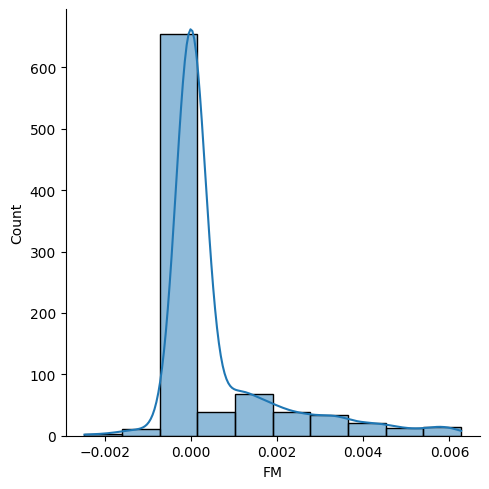

In [18]:
sns.displot(data=cardio,x='FM',bins=10,kde=True)
plt.show()

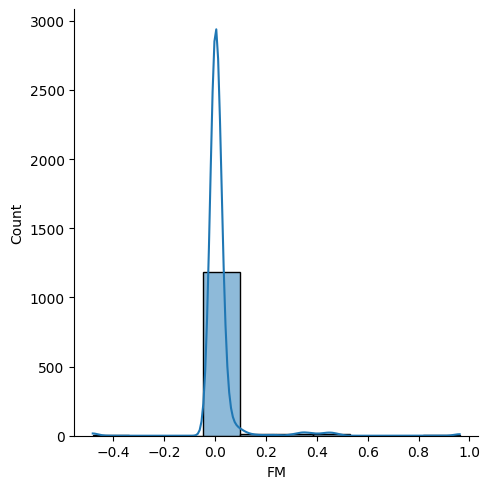

In [19]:
sns.displot(data=cardio_outliers,x='FM',bins=10,kde=True)
plt.show()

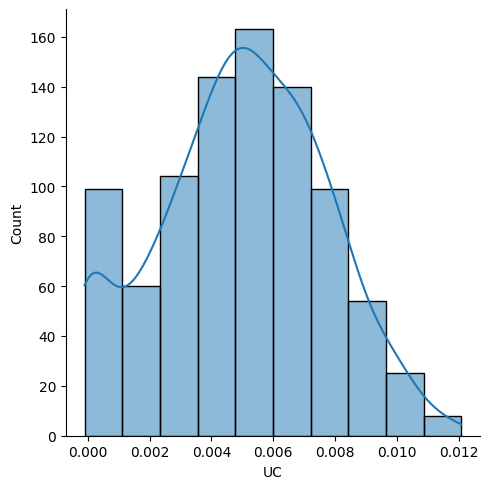

In [20]:
sns.displot(data=cardio,x='UC',bins=10,kde=True)
plt.show()

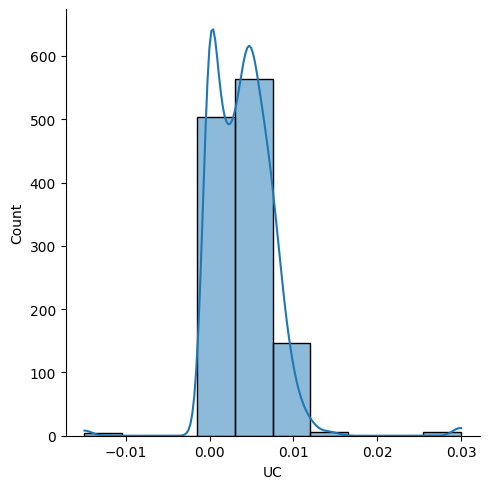

In [21]:
sns.displot(data=cardio_outliers,x='UC',bins=10,kde=True)
plt.show()

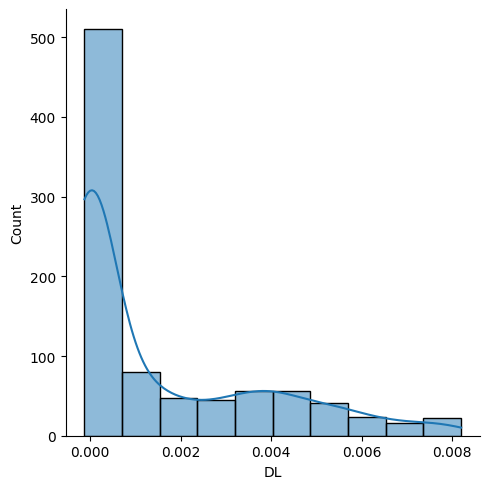

In [22]:
sns.displot(data=cardio,x='DL',bins=10,kde=True)
plt.show()

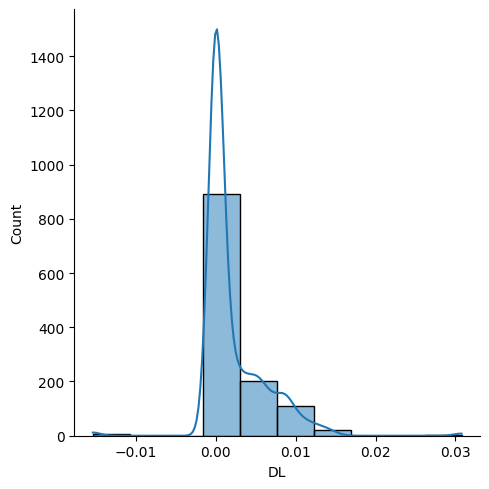

In [23]:
sns.displot(data=cardio_outliers,x='DL',bins=10,kde=True)
plt.show()

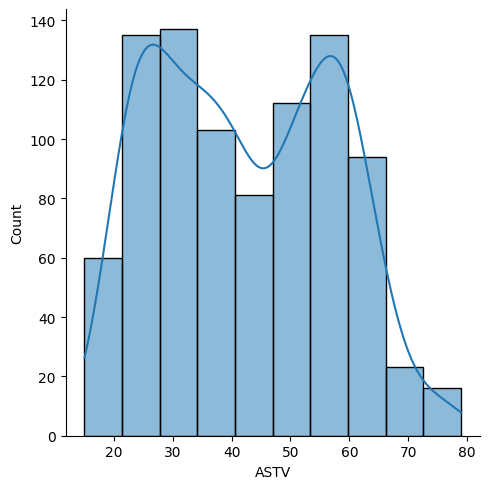

In [24]:
sns.displot(data=cardio,x='ASTV',bins=10,kde=True)
plt.show()

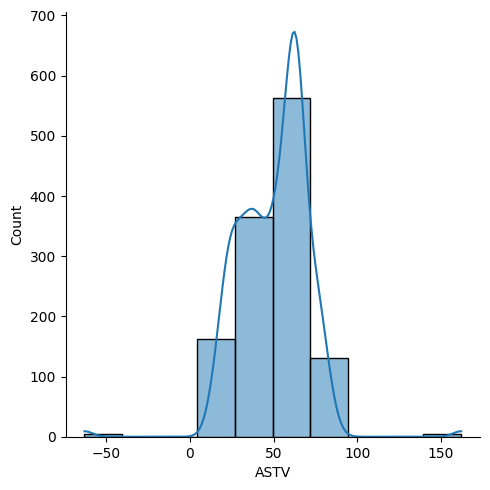

In [25]:
sns.displot(data=cardio_outliers,x='ASTV',bins=10,kde=True)
plt.show()

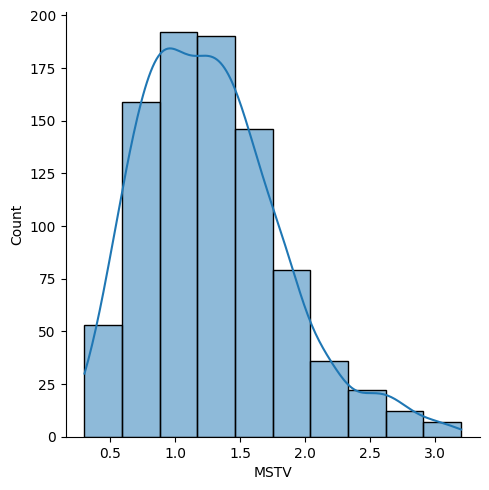

In [26]:
sns.displot(data=cardio,x='MSTV',bins=10,kde=True)
plt.show()

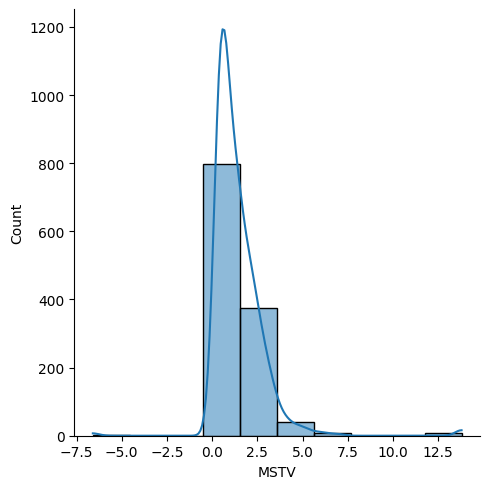

In [27]:
sns.displot(data=cardio_outliers,x='MSTV',bins=10,kde=True)
plt.show()

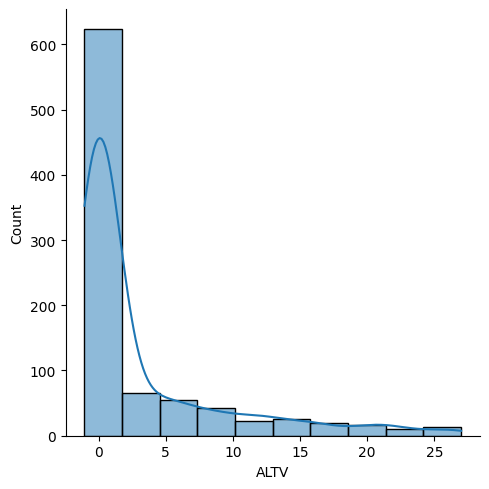

In [28]:
sns.displot(data=cardio,x='ALTV',bins=10,kde=True)
plt.show()

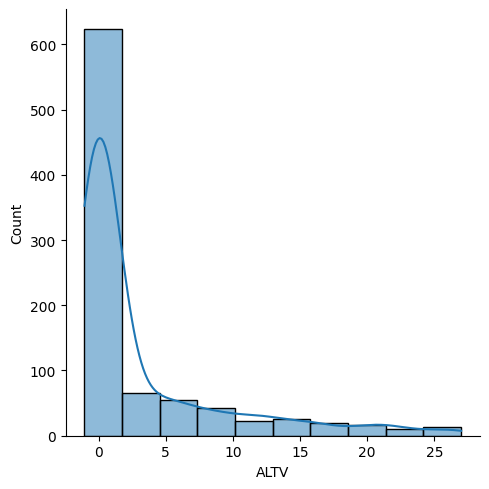

In [29]:
sns.displot(data=cardio,x='ALTV',bins=10,kde=True)
plt.show()

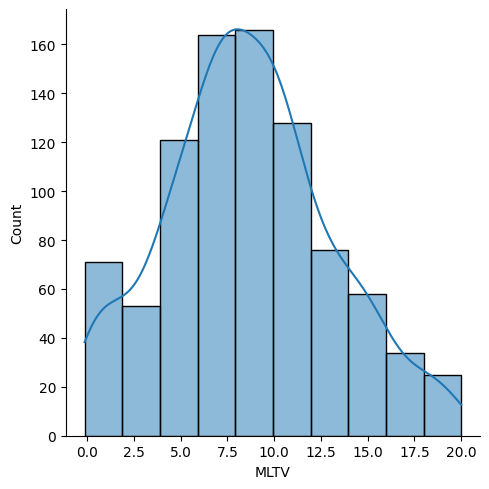

In [30]:
sns.displot(data=cardio,x='MLTV',bins=10,kde=True)
plt.show()

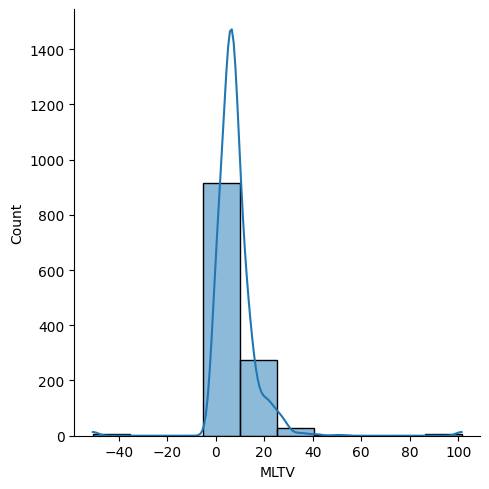

In [31]:
sns.displot(data=cardio_outliers,x='MLTV',bins=10,kde=True)
plt.show()

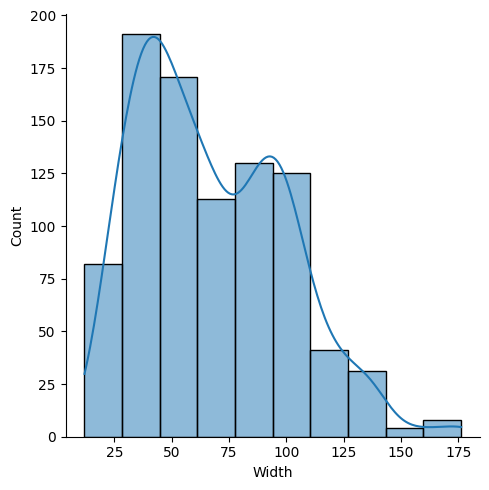

In [32]:
sns.displot(data=cardio,x='Width',bins=10,kde=True)
plt.show()

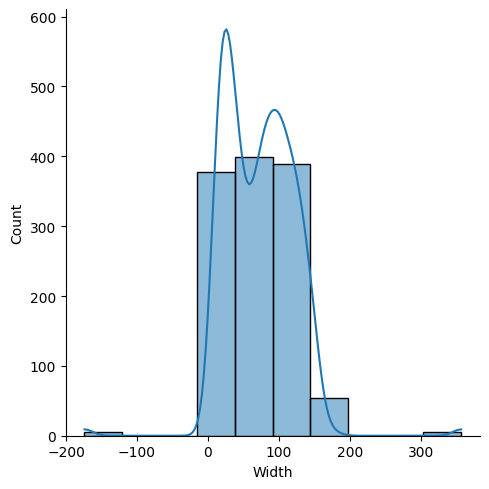

In [33]:
sns.displot(data=cardio_outliers,x='Width',bins=10,kde=True)
plt.show()

In [34]:
corr = cardio.corr().drop(index=['DS','DP','NSP'],columns=['DS','DP','NSP']) #Get corr matrix of dataset. Here I removed the DS,DP,NSP because those contains null values
corr

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
LB,1.000000,0.078465,0.007362,-0.023568,0.020806,0.262721,-0.254885,0.123808,-0.118814,0.011746,0.314180
AC,0.078465,1.000000,0.080153,0.057284,-0.101866,0.024343,0.152222,-0.323303,-0.397042,0.281806,-0.003763
FM,0.007362,0.080153,1.000000,-0.204990,0.058476,0.362630,0.113420,-0.087180,-0.110709,0.159918,0.053799
UC,-0.023568,0.057284,-0.204990,1.000000,0.177702,-0.004523,0.110100,-0.076435,-0.104061,0.018852,-0.079132
DL,0.020806,-0.101866,0.058476,0.177702,1.000000,0.001806,0.509405,-0.107464,-0.214110,0.537559,0.309511
ASTV,0.262721,0.024343,0.362630,-0.004523,0.001806,1.000000,-0.347374,0.150569,-0.330139,0.017810,0.076076
MSTV,-0.254885,0.152222,0.113420,0.110100,0.509405,-0.347374,1.000000,-0.335856,-0.007528,0.537733,0.057046
ALTV,0.123808,-0.323303,-0.087180,-0.076435,-0.107464,0.150569,-0.335856,1.000000,-0.062065,-0.214880,0.006981
MLTV,-0.118814,-0.397042,-0.110709,-0.104061,-0.214110,-0.330139,-0.007528,-0.062065,1.000000,-0.034776,-0.025815
Width,0.011746,0.281806,0.159918,0.018852,0.537559,0.017810,0.537733,-0.214880,-0.034776,1.000000,0.283811


In [35]:
corr1 = cardio_outliers.corr()
corr1

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.099842,0.006683,-0.205266,-0.189286,-0.008573,-0.082602,0.209471,-0.171240,0.212011,0.032060,-0.176251,0.207072,0.113719
AC,-0.099842,1.000000,0.034761,0.045717,-0.074604,-0.037429,-0.067673,-0.300444,0.152122,-0.247284,-0.037988,0.234259,0.043205,-0.328743
FM,0.006683,0.034761,1.000000,-0.041729,-0.001184,0.028350,0.103001,-0.071948,0.009393,-0.048689,-0.001562,0.104438,-0.018783,0.030102
UC,-0.205266,0.045717,-0.041729,1.000000,0.216395,-0.005662,0.116539,-0.215762,0.227778,-0.226044,-0.043953,0.150774,-0.068393,-0.165191
DL,-0.189286,-0.074604,-0.001184,0.216395,1.000000,0.063528,0.145827,-0.118157,0.395970,-0.241555,-0.153391,0.371728,-0.138291,-0.013115
DS,-0.008573,-0.037429,0.028350,-0.005662,0.063528,1.000000,0.001680,0.006427,0.015797,-0.009214,0.037661,0.046094,-0.018467,0.064817
DP,-0.082602,-0.067673,0.103001,0.116539,0.145827,0.001680,1.000000,0.002090,0.114178,-0.138198,-0.117924,0.194310,-0.156789,0.248491
ASTV,0.209471,-0.300444,-0.071948,-0.215762,-0.118157,0.006427,0.002090,1.000000,-0.320940,0.364306,-0.192951,-0.308208,-0.042801,0.445404
MSTV,-0.171240,0.152122,0.009393,0.227778,0.395970,0.015797,0.114178,-0.320940,1.000000,-0.326725,0.035852,0.423261,-0.060390,-0.140256
ALTV,0.212011,-0.247284,-0.048689,-0.226044,-0.241555,-0.009214,-0.138198,0.364306,-0.326725,1.000000,-0.106498,-0.417659,0.059778,0.291890


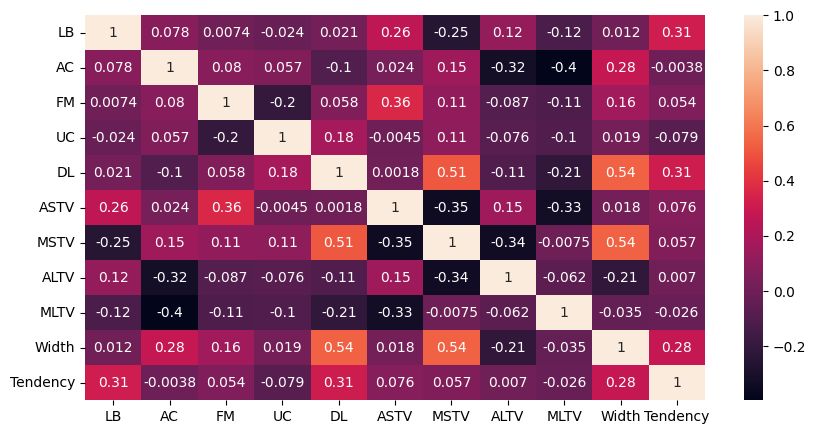

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True) #Ploting heatmap for correlation matrix
plt.show()

In [ ]:
sns.pairplot(cardio) #Ploting pair plot using seaborn for dataset which does not cointains outliers
plt.show()

# Pattern Recognition and Insights:

# Key Insights
* **Strongly Correlated :**
* The pair of columns (Width,MSTV), (Width,DL) and (MSTV,DL) are highly correlated with each other with the value 0.54 almost. It indicates that when the value increase one another column value also increases simultaneously.

* **Moderate Correlation :**
* The pair of column (LB,Tendency),(FM,ASTV) and (DL,Tendency) are moderately correlated with each other.

* **Weak Correlation :**
* The columns (MLTV,AC),(ALTV,AC),(MLTV,ASTV),(ALTV,MSTV) are with weak correlation or negative correlation.It indicates that when the value increase in the one column then the value is decrease in the another column


**The dataset set does not contains any date column so it is difficult to Look for trends or patterns over time**

# Conclusion:

# Key Insights:
**Distribution Characteristics:**

* Many variables exhibit skewness, indicating non-normal distributions. Variables such as 'AC', 'FM', and 'NSP' show significant skewness, suggesting that they may require transformations for certain statistical analyses.

**Correlation Patterns:**

* Strong positive correlations were identified between variables like MSTV and DL, as well as Width and MSTV. These relationships suggest that certain measures of variability are closely related.

**Variable Importance:**

* The 'LB' variable has a wide range, indicating variability in fetal heart rates across observations. This could be critical for assessing fetal well-being.

**Potential Redundancies:**

* High correlations between certain variables suggest redundancy, which could be considered in model development to avoid multicollinearity.

# Further Analyses:

**Clinical Monitoring:**

Understanding the relationships between different cardiotocographic measures can enhance clinical decision-making in fetal monitoring. For instance, recognizing that higher short-term variability correlates with abnormal long-term variability can help clinicians identify at-risk fetuses more effectively.

**Predictive Modeling:**

The insights gained from the correlation analysis can inform the selection of features for predictive models. Variables that are strongly correlated with outcomes of interest can be prioritized in model development.

**Data Transformation:**

The non-normal distributions of several variables suggest that data transformations may be necessary to meet the assumptions of parametric statistical tests.